In [2]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt

In [3]:
data_json = pd.read_json('https://data.cityofnewyork.us/resource/h9gi-nx95.json')
data_json.head(5)

,crash_date,crash_time,on_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,collision_id,vehicle_type_code1,vehicle_type_code2,borough,zip_code,latitude,longitude,location,cross_street_name,off_street_name,contributing_factor_vehicle_3,contributing_factor_vehicle_4,vehicle_type_code_3,vehicle_type_code_4,contributing_factor_vehicle_5,vehicle_type_code_5
0,2021-04-14T00:00:00.000,2022-01-13 05:32:00,BRONX WHITESTONE BRIDGE,0,0,0,0,0,0,0,0,Following Too Closely,Unspecified,4407480,Sedan,Sedan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-04-13T00:00:00.000,2022-01-13 21:35:00,NaN,1,0,1,0,0,0,0,0,Unspecified,NaN,4407147,Sedan,NaN,BROOKLYN,11217.0,40.68358,-73.97617,"{'latitude': '40.68358', 'longitude': '-73.976...",620 ATLANTIC AVENUE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-04-15T00:00:00.000,2022-01-13 16:15:00,HUTCHINSON RIVER PARKWAY,0,0,0,0,0,0,0,0,Pavement Slippery,NaN,4407665,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-04-13T00:00:00.000,2022-01-13 16:00:00,VANDERVORT AVENUE,0,0,0,0,0,0,0,0,Following Too Closely,Unspecified,4407811,Sedan,NaN,BROOKLYN,11222.0,NaN,NaN,NaN,NaN,ANTHONY STREET,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-04-12T00:00:00.000,2022-01-13 08:25:00,EDSON AVENUE,0,0,0,0,0,0,0,0,Unspecified,Unspecified,4406885,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,0.00000,0.00000,"{'latitude': '0.0', 'longitude': '0.0'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data_json.columns

Index(['crash_date', 'crash_time', 'on_street_name',
       'number_of_persons_injured', 'number_of_persons_killed',
       'number_of_pedestrians_injured', 'number_of_pedestrians_killed',
       'number_of_cyclist_injured', 'number_of_cyclist_killed',
       'number_of_motorist_injured', 'number_of_motorist_killed',
       'contributing_factor_vehicle_1', 'contributing_factor_vehicle_2',
       'collision_id', 'vehicle_type_code1', 'vehicle_type_code2', 'borough',
       'zip_code', 'latitude', 'longitude', 'location', 'cross_street_name',
       'off_street_name', 'contributing_factor_vehicle_3',
       'contributing_factor_vehicle_4', 'vehicle_type_code_3',
       'vehicle_type_code_4', 'contributing_factor_vehicle_5',
       'vehicle_type_code_5'],
      dtype='object')

In [5]:
data_json.isnull().sum(axis = 0)

crash_date                         0
crash_time                         0
on_street_name                   243
number_of_persons_injured          0
number_of_persons_killed           0
number_of_pedestrians_injured      0
number_of_pedestrians_killed       0
number_of_cyclist_injured          0
number_of_cyclist_killed           0
number_of_motorist_injured         0
number_of_motorist_killed          0
contributing_factor_vehicle_1      1
contributing_factor_vehicle_2    214
collision_id                       0
vehicle_type_code1                 7
vehicle_type_code2               325
borough                          367
zip_code                         367
latitude                          90
longitude                         90
location                          90
cross_street_name                757
off_street_name                  531
contributing_factor_vehicle_3    904
contributing_factor_vehicle_4    968
vehicle_type_code_3              913
vehicle_type_code_4              971
c

In [6]:
print(data_json.vehicle_type_code1.unique())

['Sedan' 'Station Wagon/Sport Utility Vehicle' 'Taxi' '�MBU'
 'Pick-up Truck' 'Box Truck' 'Bus' nan 'Ambulance' 'Tow Truck / Wrecker'
 'E-Bike' 'Van' 'Flat Bed' 'Moped' 'Tractor Truck Diesel' 'AMBULANCE'
 'Bike' 'Trailer' 'Motorcycle' 'Garbage or Refuse' 'SCHOOL BUS'
 'Lift Boom' 'scooter' 'CATER' 'PKUP' 'Carry All' 'FDNY Ambul' '3-Door'
 'Beverage Truck' 'SEMI TRAIL' 'Dump' 'Convertible' '4 dr sedan' 'dump']


In [7]:
data_json = data_json.drop('on_street_name', 1)
data_json = data_json.drop('contributing_factor_vehicle_3',1)
data_json = data_json.drop('contributing_factor_vehicle_4',1)
data_json = data_json.drop('contributing_factor_vehicle_5',1)
data_json = data_json.drop('vehicle_type_code_5',1)
data_json = data_json.drop('vehicle_type_code_4',1)

In [8]:
data_zipcode = data_json.groupby(by='zip_code').agg('count')
data_zipcode

,crash_date,crash_time,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,collision_id,vehicle_type_code1,vehicle_type_code2,borough,latitude,longitude,location,cross_street_name,off_street_name,vehicle_type_code_3
zip_code,,,,,,,,,,,,,,,,,,,,,,
10001.0,4,4,4,4,4,4,4,4,4,4,4,3,4,4,3,4,4,4,4,2,2,1
10002.0,3,3,3,3,3,3,3,3,3,3,3,1,3,3,0,3,3,3,3,1,2,0
10003.0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,0,0
10005.0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,0,1,0
10009.0,2,2,2,2,2,2,2,2,2,2,2,1,2,2,1,2,2,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11434.0,7,7,7,7,7,7,7,7,7,7,7,2,7,7,0,7,7,7,7,2,5,0
11435.0,5,5,5,5,5,5,5,5,5,5,5,4,5,5,2,5,5,5,5,4,1,1
11436.0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,3,1


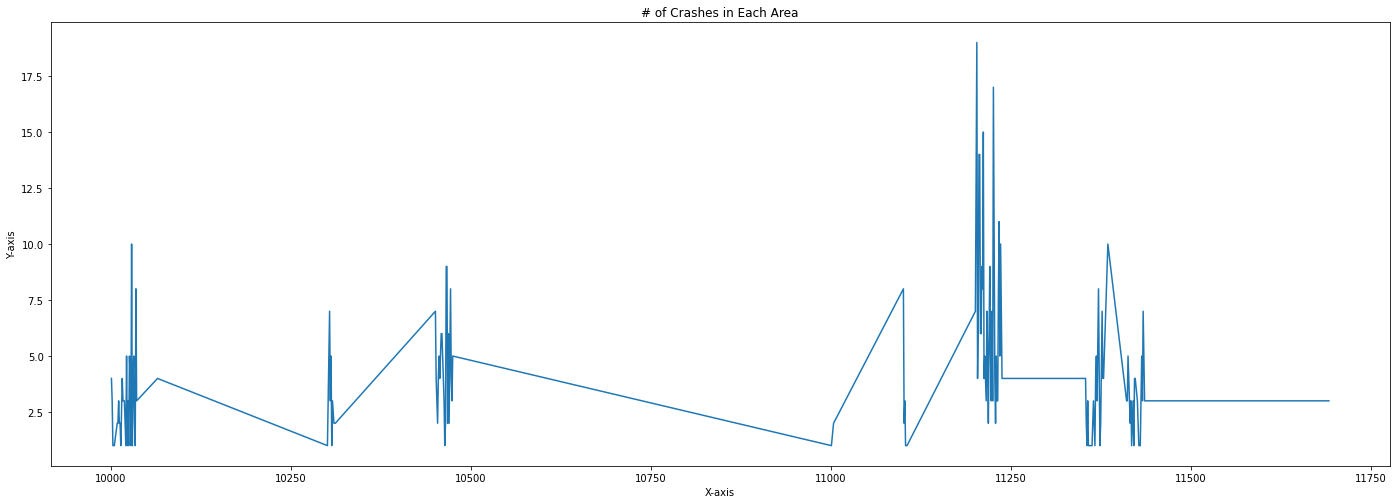

In [9]:
plt.figure(figsize=(24, 8))
plt.plot(data_zipcode.index,data_zipcode['crash_date'])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title("# of Crashes in Each Area")
spacing = 0.1100000
plt.subplots_adjust(bottom=spacing)
plt.show()

In [10]:
data_cause = data_json.groupby(by='contributing_factor_vehicle_1').agg('count')
data_cause

,crash_date,crash_time,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_2,collision_id,vehicle_type_code1,vehicle_type_code2,borough,zip_code,latitude,longitude,location,cross_street_name,off_street_name,vehicle_type_code_3
contributing_factor_vehicle_1,,,,,,,,,,,,,,,,,,,,,,
Aggressive Driving/Road Rage,3,3,3,3,3,3,3,3,3,3,3,3,3,1,1,1,3,3,3,0,1,0
Alcohol Involvement,18,18,18,18,18,18,18,18,18,18,15,18,18,15,15,15,16,16,16,10,7,6
Animals Action,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,0,0
Backing Unsafely,31,31,31,31,31,31,31,31,31,31,28,31,31,21,23,23,30,30,30,10,13,0
Brakes Defective,4,4,4,4,4,4,4,4,4,4,2,4,4,2,2,2,4,4,4,0,2,0
Driver Inattention/Distraction,254,254,254,254,254,254,254,254,254,254,218,254,252,185,159,159,231,231,231,61,126,23
Driver Inexperience,19,19,19,19,19,19,19,19,19,19,16,19,19,16,15,15,17,17,17,5,11,3
Driverless/Runaway Vehicle,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0
Drugs (illegal),1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0


In [11]:
data_json.contributing_factor_vehicle_1.value_counts()

Unspecified                                              254
Driver Inattention/Distraction                           254
Following Too Closely                                     80
Failure to Yield Right-of-Way                             66
Passing or Lane Usage Improper                            46
Passing Too Closely                                       45
Unsafe Speed                                              34
Backing Unsafely                                          31
Traffic Control Disregarded                               30
Turning Improperly                                        22
Other Vehicular                                           21
Driver Inexperience                                       19
Alcohol Involvement                                       18
Unsafe Lane Changing                                      16
Reaction to Uninvolved Vehicle                            12
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion      9
Pavement Slippery       

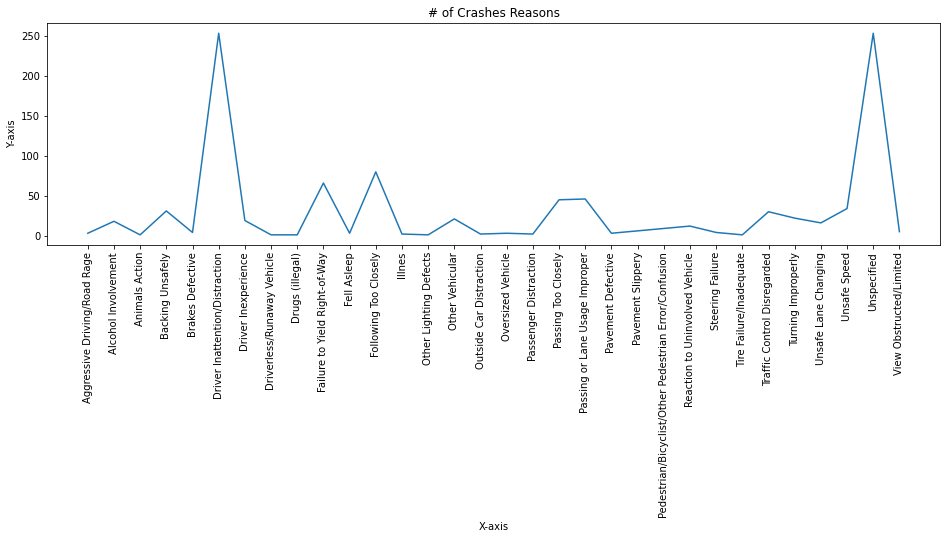

In [12]:
plt.figure(figsize=(16, 4))
plt.plot(data_cause.index,data_cause['crash_date'])
plt.xticks(data_cause.index.to_list(),rotation=90)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title("# of Crashes Reasons")
spacing = 0.11000000
plt.subplots_adjust(bottom=spacing)
plt.show()

In [13]:
data_vehicle = data_json.groupby(by='vehicle_type_code1').agg('count')
data_vehicle

,crash_date,crash_time,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,collision_id,vehicle_type_code2,borough,zip_code,latitude,longitude,location,cross_street_name,off_street_name,vehicle_type_code_3
vehicle_type_code1,,,,,,,,,,,,,,,,,,,,,,
3-Door,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
4 dr sedan,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0
AMBULANCE,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
Ambulance,3,3,3,3,3,3,3,3,3,3,3,2,3,1,3,3,3,3,3,1,2,0
Beverage Truck,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0
Bike,12,12,12,12,12,12,12,12,12,12,12,6,12,3,7,7,9,9,9,2,7,0
Box Truck,18,18,18,18,18,18,18,18,18,18,18,15,18,15,7,7,18,18,18,3,4,3
Bus,10,10,10,10,10,10,10,10,10,10,10,7,10,7,5,5,9,9,9,3,3,1
CATER,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0


In [14]:
data_json.vehicle_type_code1.value_counts()

Sedan                                  507
Station Wagon/Sport Utility Vehicle    345
Taxi                                    30
Pick-up Truck                           19
Box Truck                               18
Bike                                    12
Bus                                     10
Tractor Truck Diesel                     7
Motorcycle                               6
E-Bike                                   5
Van                                      5
Moped                                    4
Dump                                     3
Ambulance                                3
Lift Boom                                1
�MBU                                     1
PKUP                                     1
SCHOOL BUS                               1
Flat Bed                                 1
4 dr sedan                               1
Beverage Truck                           1
3-Door                                   1
CATER                                    1
Trailer    

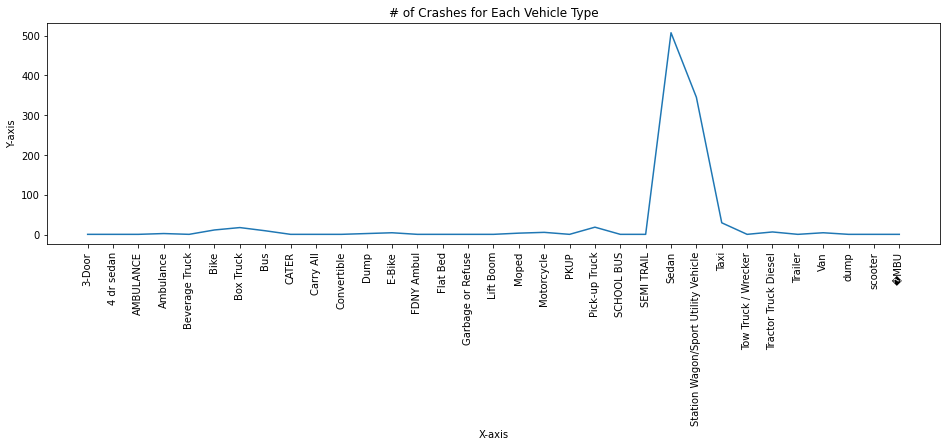

In [15]:
plt.figure(figsize=(16, 4))
plt.plot(data_vehicle.index,data_vehicle['crash_date'])
#plt.plot(range(100))
#plt.xlim(1,550)
#plt.ylim(1,550)
plt.xticks(data_vehicle.index.to_list(),rotation=90)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title("# of Crashes for Each Vehicle Type")
spacing = 0.11000000
plt.subplots_adjust(bottom=spacing)
plt.show()
#plt.figure(figsize=(210, 240))

In [16]:
data_json['crash_month'] = pd.DatetimeIndex(data_json['crash_date']).month
data_month = data_json.groupby(by='crash_month').agg('count')
data_month

,crash_date,crash_time,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,collision_id,vehicle_type_code1,vehicle_type_code2,borough,zip_code,latitude,longitude,location,cross_street_name,off_street_name,vehicle_type_code_3
crash_month,,,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,0
2,3,3,3,3,3,3,3,3,3,3,3,1,3,3,0,3,3,3,3,3,3,0,0
3,10,10,10,10,10,10,10,10,10,10,10,7,10,10,7,7,7,9,9,9,3,6,1
4,969,969,969,969,969,969,969,969,969,969,968,767,969,962,658,614,614,886,886,886,234,455,86
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0
6,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,0,0
7,11,11,11,11,11,11,11,11,11,11,11,8,11,11,7,7,7,10,10,10,2,6,0
10,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0
11,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0


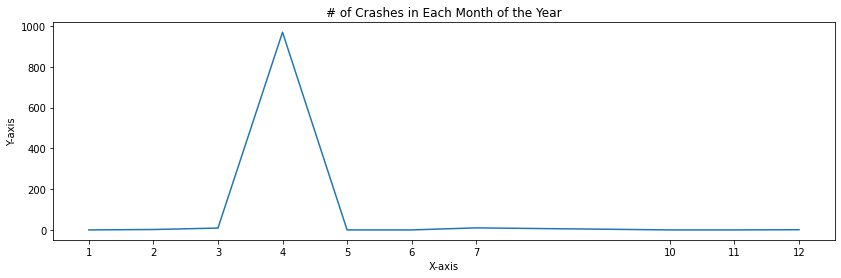

In [17]:
plt.figure(figsize=(14, 4))
plt.plot(data_month.index,data_month['crash_date'])
plt.xticks(data_month.index.to_list())
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title("# of Crashes in Each Month of the Year")
plt.show()

In [18]:
data_json['crash_hour'] = data_json['crash_time'].dt.hour
data_hour= data_json.groupby(by='crash_hour').agg('count')
data_hour

,crash_date,crash_time,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,collision_id,vehicle_type_code1,vehicle_type_code2,borough,zip_code,latitude,longitude,location,cross_street_name,off_street_name,vehicle_type_code_3,crash_month
crash_hour,,,,,,,,,,,,,,,,,,,,,,,,
0,52,52,52,52,52,52,52,52,52,52,52,42,52,52,29,36,36,48,48,48,13,27,5,52
1,15,15,15,15,15,15,15,15,15,15,15,12,15,15,10,3,3,13,13,13,1,2,0,15
2,17,17,17,17,17,17,17,17,17,17,17,11,17,17,10,12,12,13,13,13,4,10,2,17
3,12,12,12,12,12,12,12,12,12,12,12,8,12,12,8,8,8,11,11,11,3,6,6,12
4,15,15,15,15,15,15,15,15,15,15,15,13,15,15,11,9,9,15,15,15,4,6,0,15
5,11,11,11,11,11,11,11,11,11,11,11,10,11,11,9,7,7,10,10,10,3,4,3,11
6,26,26,26,26,26,26,26,26,26,26,26,21,26,25,17,16,16,24,24,24,9,8,2,26
7,21,21,21,21,21,21,21,21,21,21,21,17,21,21,12,13,13,19,19,19,7,7,2,21
8,41,41,41,41,41,41,41,41,41,41,41,32,41,41,29,26,26,38,38,38,8,20,5,41


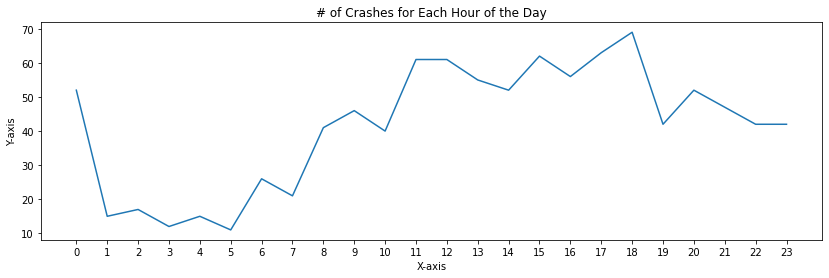

In [19]:
plt.figure(figsize=(14, 4))

plt.plot(data_hour.index,data_hour['crash_date'])
plt.xticks(data_hour.index.to_list())
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title("# of Crashes for Each Hour of the Day")
plt.show()

In [20]:
unique_factor = data_json.contributing_factor_vehicle_1.value_counts()
unique_factor.size

32

In [21]:
unique_factor.index
#unique_factor['Unspecified']

Index(['Unspecified', 'Driver Inattention/Distraction',
       'Following Too Closely', 'Failure to Yield Right-of-Way',
       'Passing or Lane Usage Improper', 'Passing Too Closely', 'Unsafe Speed',
       'Backing Unsafely', 'Traffic Control Disregarded', 'Turning Improperly',
       'Other Vehicular', 'Driver Inexperience', 'Alcohol Involvement',
       'Unsafe Lane Changing', 'Reaction to Uninvolved Vehicle',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'Pavement Slippery', 'View Obstructed/Limited', 'Brakes Defective',
       'Steering Failure', 'Pavement Defective', 'Fell Asleep',
       'Aggressive Driving/Road Rage', 'Oversized Vehicle',
       'Passenger Distraction', 'Illnes', 'Outside Car Distraction',
       'Tire Failure/Inadequate', 'Other Lighting Defects', 'Drugs (illegal)',
       'Animals Action', 'Driverless/Runaway Vehicle'],
      dtype='object')

In [23]:
li = []
for item in unique_factor.index:
  x = 0
  for index, row in data_json.iterrows():
    if row['contributing_factor_vehicle_1'] == item or row['contributing_factor_vehicle_2'] == item:
      x += row['number_of_persons_injured']
      #print(row)
  li.append(x)

In [24]:
li

[290,
 109,
 49,
 59,
 8,
 7,
 27,
 9,
 19,
 17,
 12,
 11,
 7,
 4,
 8,
 7,
 6,
 1,
 3,
 1,
 3,
 6,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0]

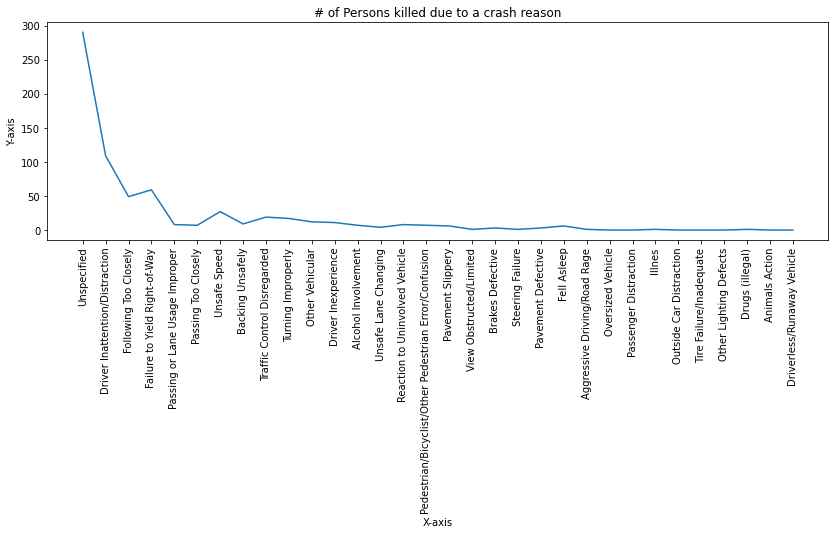

In [25]:
plt.figure(figsize=(14, 4))
plt.plot(unique_factor.index,li)
plt.xticks(unique_factor.index.to_list(), rotation=90)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title("# of Persons killed due to a crash reason")
plt.show()

In [26]:
data_json.iloc[1]

crash_date                                                 2021-04-13T00:00:00.000
crash_time                                                     2022-01-13 21:35:00
number_of_persons_injured                                                        1
number_of_persons_killed                                                         0
number_of_pedestrians_injured                                                    1
number_of_pedestrians_killed                                                     0
number_of_cyclist_injured                                                        0
number_of_cyclist_killed                                                         0
number_of_motorist_injured                                                       0
number_of_motorist_killed                                                        0
contributing_factor_vehicle_1                                          Unspecified
contributing_factor_vehicle_2                                                  NaN
coll

# Correlation

In [27]:
import seaborn as sns
import numpy as np

data_json.corr()

,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,collision_id,zip_code,latitude,longitude,crash_month,crash_hour
number_of_persons_injured,1.000000,0.091052,0.212360,-0.017209,0.154505,NaN,0.918344,0.145912,0.027919,0.010410,0.026641,-0.026439,-0.018436,0.101237
number_of_persons_killed,0.091052,1.000000,-0.011515,0.706753,-0.008022,NaN,0.099643,0.706753,0.000827,0.022684,0.001662,-0.003312,-0.003501,0.037111
number_of_pedestrians_injured,0.212360,-0.011515,1.000000,-0.008138,-0.024270,NaN,-0.104539,-0.008138,0.017863,-0.027532,-0.031548,0.031251,-0.013285,0.063937
number_of_pedestrians_killed,-0.017209,0.706753,-0.008138,1.000000,-0.005670,NaN,-0.013514,-0.001001,0.001153,0.022684,0.001662,-0.003312,-0.002475,0.008421
number_of_cyclist_injured,0.154505,-0.008022,-0.024270,-0.005670,1.000000,NaN,-0.076543,-0.005670,0.033711,0.018756,0.015899,-0.015385,0.013684,0.025862
number_of_cyclist_killed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_motorist_injured,0.918344,0.099643,-0.104539,-0.013514,-0.076543,NaN,1.000000,0.154360,0.010519,0.018257,0.033994,-0.033749,-0.024386,0.076349
number_of_motorist_killed,0.145912,0.706753,-0.008138,-0.001001,-0.005670,NaN,0.154360,1.000000,0.000017,NaN,NaN,NaN,-0.002475,0.044036
collision_id,0.027919,0.000827,0.017863,0.001153,0.033711,NaN,0.010519,0.000017,1.000000,-0.042760,0.001749,-0.001234,0.061760,-0.016375
zip_code,0.010410,0.022684,-0.027532,0.022684,0.018756,NaN,0.018257,NaN,-0.042760,1.000000,-0.062794,0.050200,-0.057001,-0.027180


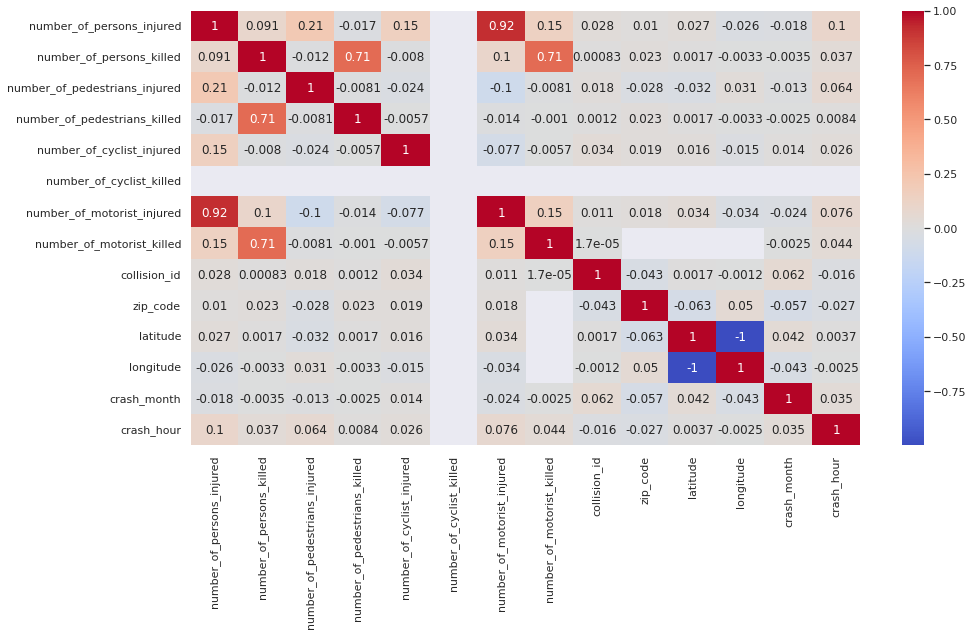

In [28]:
# A good way to quickly check correlations among columns is by visualizing the correlation matrix as a heatmap
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(data_json.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

In [30]:
# Correlated features, in general, don’t improve models but they affect specific models in different ways 
# and to varying extents. It is clear that correlated features means that they bring the same information, 
# so it is logical to remove one of them.

corrMatrix=data_json.corr().abs()
upperMatrix = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(np.bool))
corrFeatures = [column for column in upperMatrix.columns if any(upperMatrix[column] > 0.90)]
print(corrFeatures)
data_json.drop(columns=corrFeatures)

['number_of_motorist_injured', 'longitude']


,crash_date,crash_time,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,collision_id,vehicle_type_code1,vehicle_type_code2,borough,zip_code,latitude,location,cross_street_name,off_street_name,vehicle_type_code_3,crash_month,crash_hour
0,2021-04-14T00:00:00.000,2022-01-13 05:32:00,0,0,0,0,0,0,0,Following Too Closely,Unspecified,4407480,Sedan,Sedan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,5
1,2021-04-13T00:00:00.000,2022-01-13 21:35:00,1,0,1,0,0,0,0,Unspecified,NaN,4407147,Sedan,NaN,BROOKLYN,11217.0,40.683580,"{'latitude': '40.68358', 'longitude': '-73.976...",620 ATLANTIC AVENUE,NaN,NaN,4,21
2,2021-04-15T00:00:00.000,2022-01-13 16:15:00,0,0,0,0,0,0,0,Pavement Slippery,NaN,4407665,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,16
3,2021-04-13T00:00:00.000,2022-01-13 16:00:00,0,0,0,0,0,0,0,Following Too Closely,Unspecified,4407811,Sedan,NaN,BROOKLYN,11222.0,NaN,NaN,NaN,ANTHONY STREET,NaN,4,16
4,2021-04-12T00:00:00.000,2022-01-13 08:25:00,0,0,0,0,0,0,0,Unspecified,Unspecified,4406885,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,0.000000,"{'latitude': '0.0', 'longitude': '0.0'}",NaN,NaN,NaN,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2021-04-17T00:00:00.000,2022-01-13 18:59:00,0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,4408172,Taxi,NaN,BRONX,10466.0,40.880623,"{'latitude': '40.880623', 'longitude': '-73.84...",NaN,GRACE AVENUE,NaN,4,18
996,2021-04-17T00:00:00.000,2022-01-13 14:10:00,0,0,0,0,0,0,0,Passing Too Closely,Other Vehicular,4407982,dump,Station Wagon/Sport Utility Vehicle,QUEENS,11432.0,40.715790,"{'latitude': '40.71579', 'longitude': '-73.797...",NaN,168 STREET,NaN,4,14
997,2021-04-06T00:00:00.000,2022-01-13 08:23:00,0,0,0,0,0,0,0,Following Too Closely,Unspecified,4405027,Sedan,Pick-up Truck,BROOKLYN,11201.0,NaN,NaN,NaN,Hicks street,NaN,4,8
998,2021-04-17T00:00:00.000,2022-01-13 00:55:00,0,0,0,0,0,0,0,Alcohol Involvement,Unspecified,4407957,Sedan,Station Wagon/Sport Utility Vehicle,BROOKLYN,11237.0,40.708084,"{'latitude': '40.708084', 'longitude': '-73.92...",1241 FLUSHING AVENUE,NaN,NaN,4,0
